# Movie Dataset Data inspection and preprocessing

In [1]:
import numpy as np
import pandas as pd

# Read in the data
# Because the ultimate goal of our project is to build a system which predict the revenue of non-released movies, 
# we propose that the revenue is likely to be related to the case, genere, production company, and the release date of the movie.
# In the rest of this notebook, we will try to verify our hypothesis by inspecting the data.
metadata_path = 'data/movies_metadata.csv'
credit_path = 'data/credits.csv'

import warnings
# warnings.filterwarnings('ignore')

metadata = pd.read_csv(metadata_path, low_memory=False)
credit = pd.read_csv(credit_path, low_memory=False)

Since we are building a system that predict the revenue of un-released movies, the user ratings, votes, we will not have them.  
We will drop those columns.

In [2]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
credit.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
credit.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [6]:
id_to_drop = []
for i in range(45465+1):
    try:
        int_id = int(metadata['id'][i])
    except:
        print(i, metadata['id'][i], metadata['title'][i])
        id_to_drop.append(i)  
for i in reversed(id_to_drop):    
    metadata.drop(i, axis=0, inplace=True)

19730 1997-08-20 nan
29503 2012-09-29 nan
35587 2014-01-01 nan


In [7]:
# Because the id in metadata is string, we need to convert it to int so that we can merge the two dataframes.
metadata['id'] = metadata['id'].astype(int)
full_data = pd.merge(metadata, credit, left_on='id', right_on='id', how='left')

In [8]:
full_data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45534,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
45535,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45536,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45537,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


We can see that there are some nans in some of the columns, some columns has small numbers of nans which could be ignored. Some column like belongs_to_collection, nan means no collection that the movie is belong to, so we need to create special embedding for that. Another way of doing is some data might be nan in our csv but available online, we can find them and fill in it ourselves.

Here because there are hundreds of data missing in column release data and runtime, we just remove them.

In [9]:
# Remove nans in release_date and runtime
full_data.drop(full_data[full_data['release_date'].isnull()].index, inplace=True)
full_data.drop(full_data[full_data['runtime'].isnull()].index, inplace=True)

We have the release data in string format, we will only keep month for future use.

In [10]:
full_data['release_date'] = pd.to_datetime(full_data['release_date'], format='%Y-%m-%d',errors='coerce').dt.month.astype(int)

Upon inspecting, we can see that some of the columns are json in string format. We could convert them from string to dictionary, so we save a lot of work reading useful data.

In [11]:
import json
import math
from json.decoder import JSONDecodeError

json_columns = ['belongs_to_collection', 'genres', 'spoken_languages', 'production_companies', 'production_countries', 'cast', 'crew']
# We defined those columns as json columns because they are in json format.
def correction_and_load_json(json_str):
    if isinstance(json_str, float) and math.isnan(json_str):
        return json_str
    if isinstance(json_str, dict):
        return json_str
    if json_str is None:
        return json_str
    try:
        return json.loads(json_str)
    except JSONDecodeError:
        # You can attempt to fix the JSON format by replacing single quotes with double quotes
        fixed_str = json_str.replace("'", '"')
        try:
            return json.loads(fixed_str)
        except:
            # print(json_str)
            return json_str

        # try:
        #     return json.loads(fixed_str)
        # except:
        #     # If you can't fix it, return a NaN
        #     return np.nan
    except TypeError:
        # print(json_str)
        return json_str
    except:
        print(json_str)
        # return np.nan
        return json_str

for column in json_columns:
    # print("Current column: ", column)
    full_data[column] = full_data[column].map(correction_and_load_json)

In [12]:
has_or_not = ['belongs_to_collection', 'homepage', 'tagline']
new_column = ['has_collection', 'has_homepage', 'has_tagline']
for i in range(len(has_or_not)):
    full_data[new_column[i]] = full_data[has_or_not[i]].apply(lambda x: 0 if x is np.nan else 1)

In [13]:
# Add crew_count feature
full_data['crew_count'] = full_data['crew'].apply(lambda x: len(x) if x is not np.nan else 0)
# Add genres_count feature
full_data['genres_count'] = full_data['genres'].apply(lambda x: len(x) if x is not np.nan else 0)

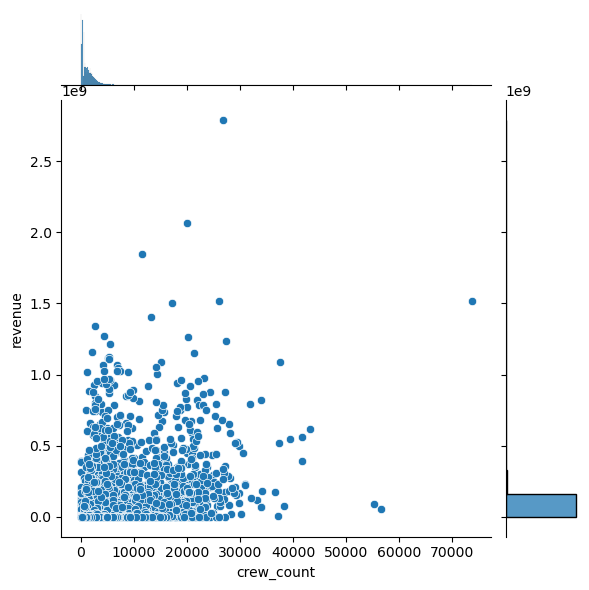

In [14]:
import seaborn as sns

# plot crew_count vs revenue
sns.jointplot(x='crew_count', y='revenue', data=full_data)


<Axes: xlabel='has_collection', ylabel='revenue'>

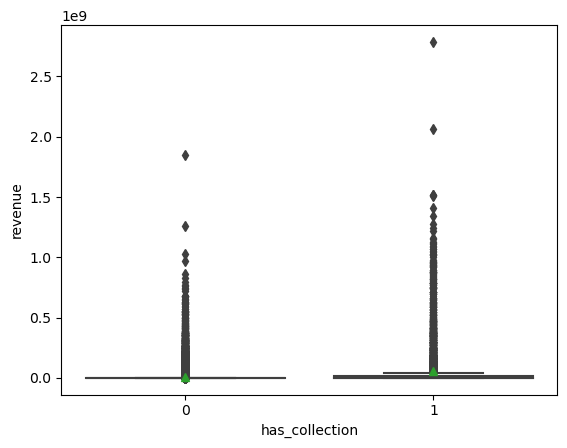

In [15]:
# plot has_collection vs revenue
sns.boxplot(x='has_collection', y='revenue', data=full_data, showmeans=True)

<Axes: xlabel='genres_count', ylabel='revenue'>

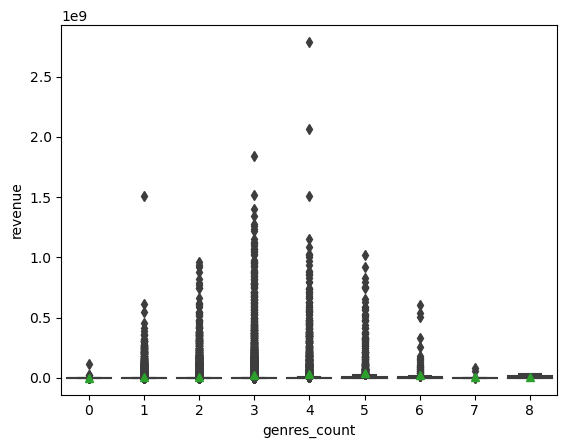

In [18]:
sns.boxplot(x='genres_count', y='revenue', data=full_data, showmeans=True)

In [29]:
full_data['genres_top'] = full_data['genres'].apply(lambda x: x[0]['name'] if x is not np.nan and len(x)>0 else np.nan)
full_data['genres_second'] = full_data['genres'].apply(lambda x: x[1]['name'] if x is not np.nan and len(x)>1 else np.nan)

In [21]:
full_data["has_collection"] = full_data["belongs_to_collection"].apply(lambda x: 0 if x is np.nan else 1)
useful_data = full_data[['adult', 'budget', 'genres','production_companies', 'release_date', 'runtime', 'cast', 'crew', 'has_collection', 'revenue']]
useful_data['adult'] = useful_data['adult'].apply(lambda x: 1 if x else 0)
useful_data['budget'] = useful_data['budget'].apply(lambda x: int(x) if x.isnumeric() else 0)

/var/folders/1v/q7mr9jhx4fg5mfr2ts3ypb4r0000gn/T/ipykernel_34864/4065046969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data['adult'] = useful_data['adult'].apply(lambda x: 1 if x else 0)
/var/folders/1v/q7mr9jhx4fg5mfr2ts3ypb4r0000gn/T/ipykernel_34864/4065046969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data['budget'] = useful_data['budget'].apply(lambda x: int(x) if x.isnumeric() else 0)


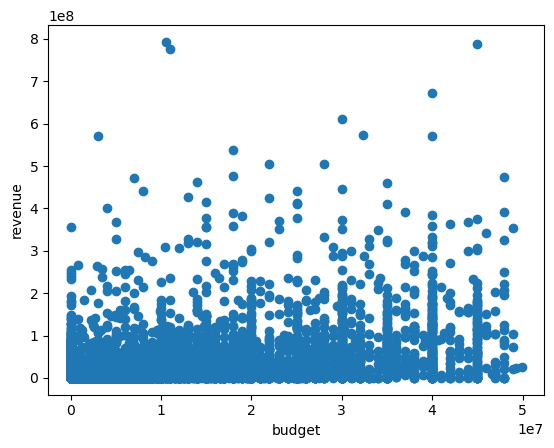

In [22]:
import matplotlib.pyplot as plt

plt.plot(useful_data['budget'][useful_data["budget"]<5e7], useful_data['revenue'][useful_data["budget"]<5e7], 'o')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()

It seems like the budget alone does not dicide the revenue. One thing to be noted that there are many movie that shares the same budget, and in movie induestry, budget does not necessary reflect the actual spending on the movie.

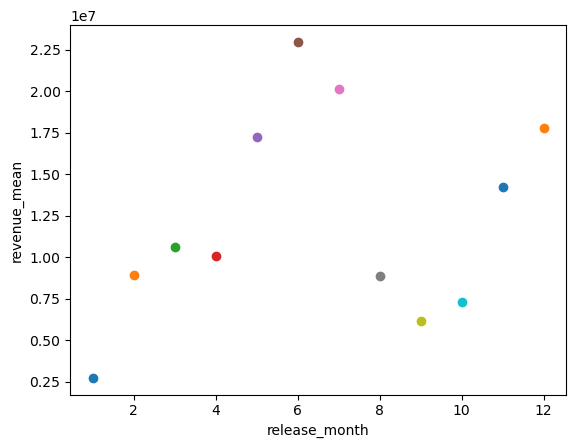

In [23]:
# plt.plot(useful_data['release_date'], useful_data['revenue'], 'o')
for i in range(1, 13):
    plt.plot(i, useful_data['revenue'][useful_data['release_date']==i].mean(), 'o', label='month '+str(i))
plt.xlabel('release_month')
plt.ylabel('revenue_mean')
plt.show()

We can see it quite clear from this plot, it seems like revenue of movie has something to do with the month of its release.

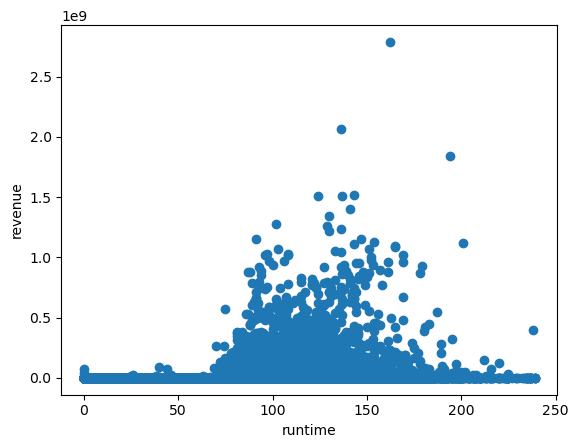

In [24]:
plt.plot(useful_data['runtime'][useful_data['runtime']<240], useful_data['revenue'][useful_data['runtime']<240], 'o')
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.show()

In [25]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45206 entries, 0 to 45538
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45206 non-null  object 
 1   belongs_to_collection  4490 non-null   object 
 2   budget                 45206 non-null  object 
 3   genres                 45206 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45206 non-null  int64  
 6   imdb_id                45194 non-null  object 
 7   original_language      45195 non-null  object 
 8   original_title         45206 non-null  object 
 9   overview               44511 non-null  object 
 10  popularity             45206 non-null  object 
 11  poster_path            44884 non-null  object 
 12  production_companies   45206 non-null  object 
 13  production_countries   45206 non-null  object 
 14  release_date           45206 non-null  int64  
 15  re

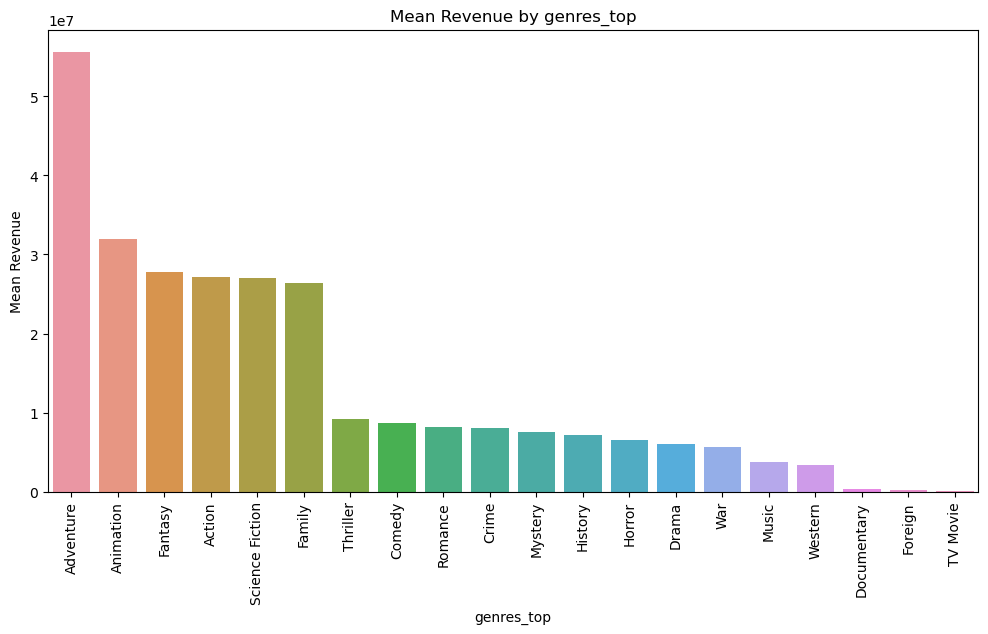

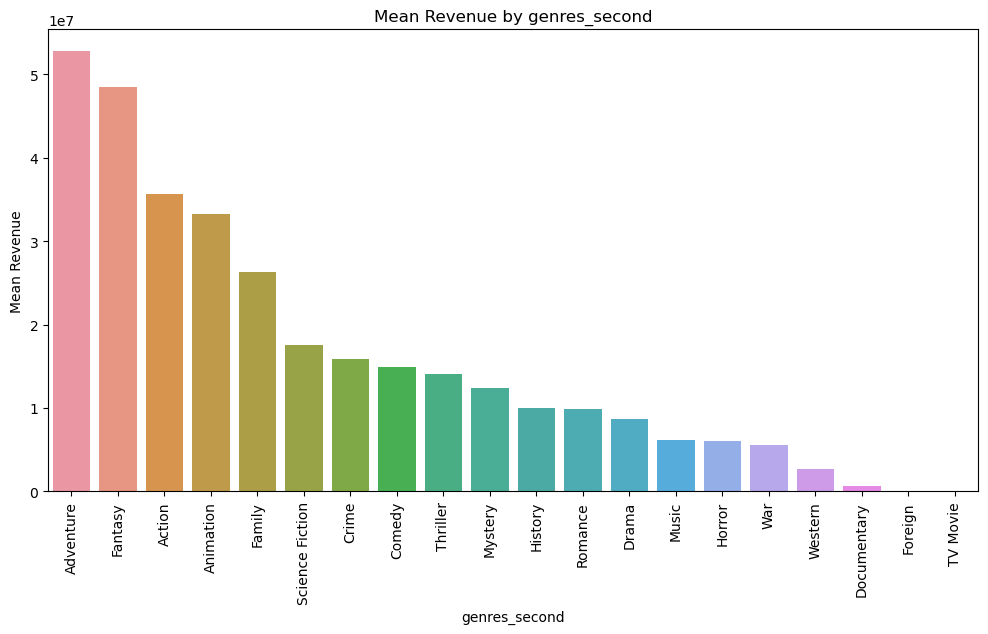

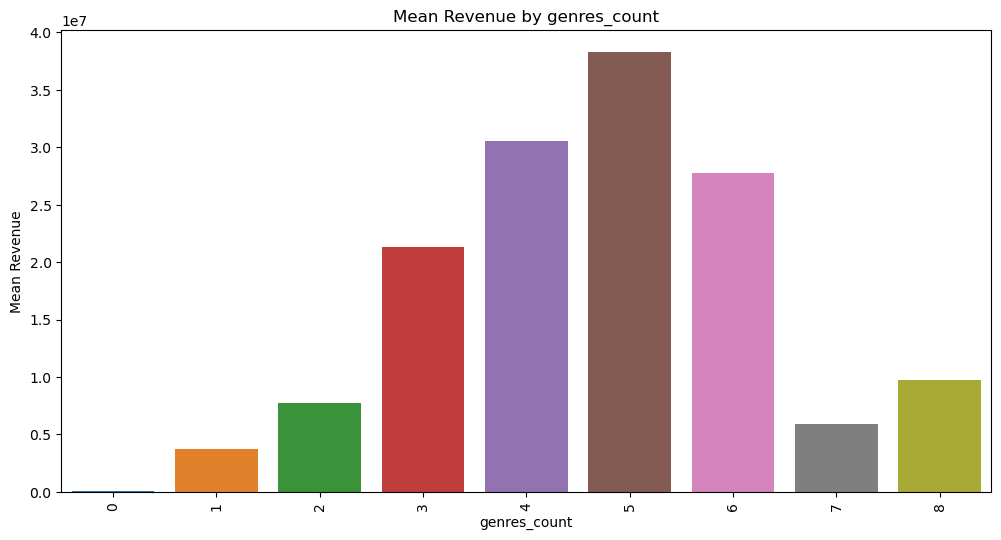

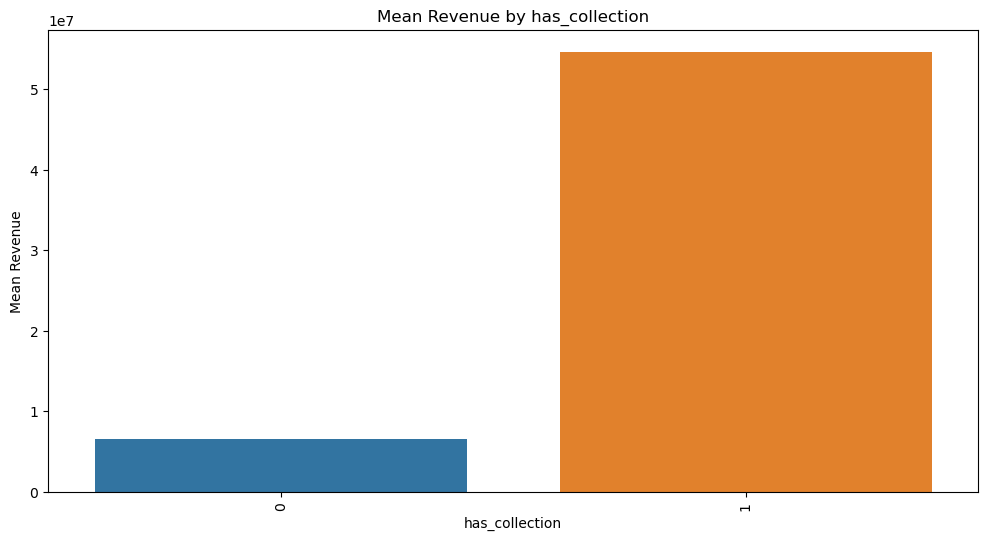

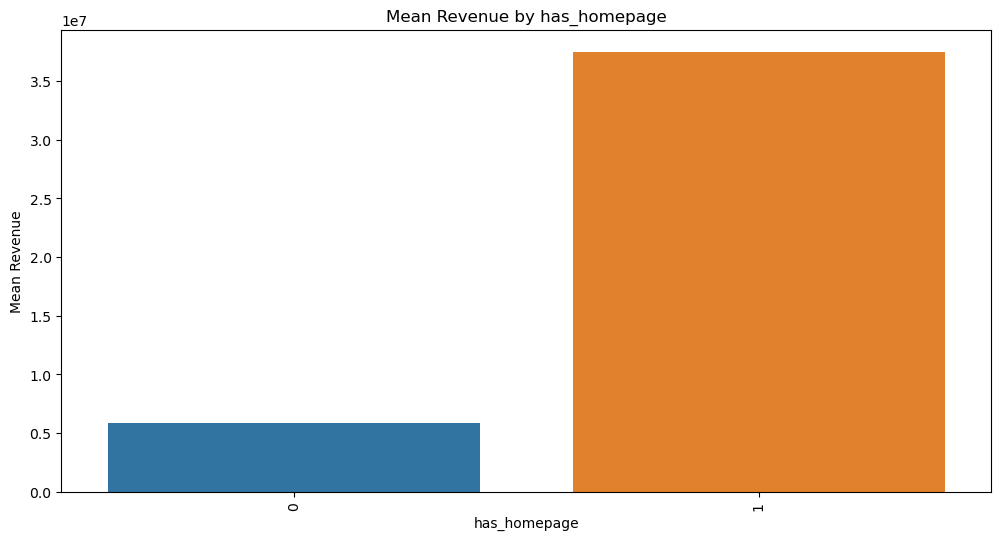

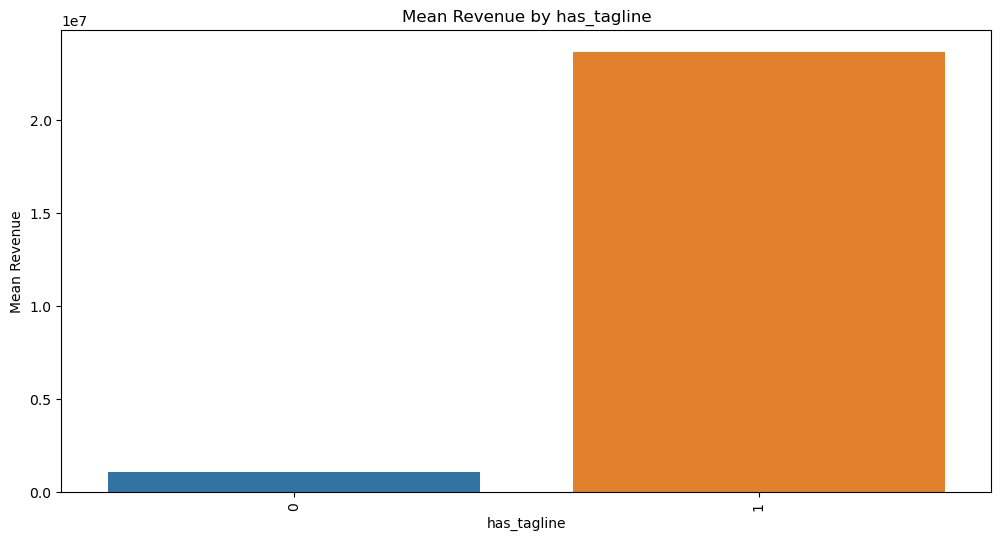

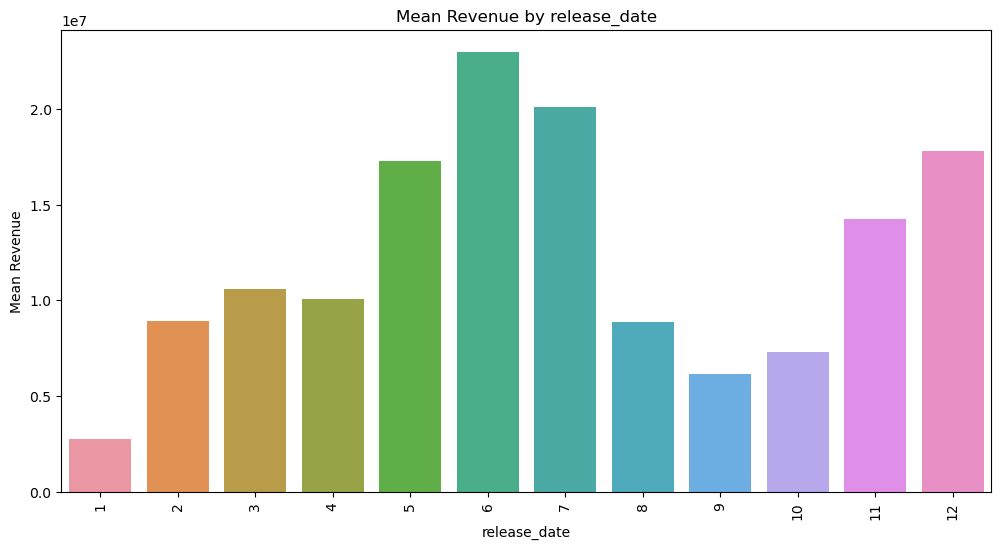

In [34]:
categorical_columns = ['genres_top','genres_second', 'genres_count', 'has_collection', 'has_homepage', 'has_tagline','release_date']
numerical_column = 'revenue'


for cat_col in categorical_columns:
    mean_revenue_df = full_data.groupby(cat_col, as_index=False)[numerical_column].mean()
    mean_revenue_df = mean_revenue_df.sort_values(by=numerical_column, ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_col, y=numerical_column, data=mean_revenue_df)
    
    
    plt.title(f"Mean Revenue by {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel("Mean Revenue")
    
    
    plt.xticks(rotation=90)
    plt.show()